# 音声データに関する基礎知識

### コンピュータで扱う音声データ
- サウンドはスピーカーの振動紙（コーン）を振動させて発生する
- 波形をデータの列にしたものがサウンドデータ
- 連続的な波形を離散化(サンプリング)してdata列(配列)にする
    - バラバラの座標データの列(数値の配列data)
    - コンピューターで扱うデータなので離散化は必須


- <u>「1秒間の音を何個のpointにするのか?」</u>
    - **サンプリング周波数**
    - サウンドのdataを何を意味するのかを理解するのに欠かせない概念の一つ
        - 例)　CDのサウンドは１秒の音を44,100個のpointとして扱っている(離散化している)　->　44.1KHz(キロヘルツ)


- <u>「1つの値を何bitの値にするのか?」</u>
    - **量子化ビット数**
        - 例）　CDのサウンドでは１つの値を,16bitの値(-32,768~32,767)として表現(int16型)している　->　**16bit量子化**


- <u>ステレオサウンドでは左右の２つの音を同時に扱う</u>
    - **チャンネル数** は２つであるという表現になる

#### サンプリング周波数が大きほど,音質が良い
- <u>時間方向に区切る表現方法</u>
    - 音楽CDでは, 44.1KHz, 48KHzが採用されている
    - ハイレゾサウンドでは, 96KHz　以上　->　１秒間に　96,000個に区切られている


#### 量子化ビット数が大きい程,音質が良い
- <u>1点１点の数値を表現するときのbit数で表す表現方法</u>
    - 音楽CDでは 16bitが採用されている
        - 16bit整数　->　段階で言うと　1pointで 65,563 段階
    - ハイレゾサウンドでは 24bit以上
        - 段階で言うと 1pointで　16,777,216　段階
        - 離散化　=　肌理の細やかさが非常に緻密である　=　音質が良い


#### 音声データのフォーマット
- <u>WAV形式</u>　:　最も標準的なフォーマットの1つ
    - 非圧縮の形式(原音のまま)で data size は大きい, 音質は良い


- <u>mp3</u>　:　広く普及したフォーマットの１つ
    - 圧縮形式のサウンドで data size は小さい,　（WAV形式の10分の１未満）
    - 若干の音質劣化がある
        -　色々な情報を選択的に間引いている

- その他、多数ある...

## 基本的な扱い
- 1. 波形の数値データをファイルから読み込んで NumPy の配列 object として扱う
- 2. NumPy の配列データとして音声を合成する
- 3. NumPy の配列データを音声データファイルとして保存する

# 音声データの扱い(1)

- 正弦波形(サインカーブ)のサウンドを例に用いる
    - 最も単純で、最も純粋なものである
    -　例) 442Hzの正弦波形のサウンドを3秒の長さで作成する
        - NumPyの配列としてサウンド（波形データ）を作成する
        - matplotlibで波形を表示して確認する
        - 実際に再生する

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### サウンドデータの生成

In [6]:
r = 44100  # サンプリング周波数 -> 音をバラバラに分解するときのキメの細かさ
f = 442    # サウンドの周波数 -> 音そのモノの１秒間の振動数
tt = 3     # 再生時間(秒)
t = np.linspace(0, tt, r*tt)  # 幅の一定な数列を生成(始点, 終点, 何個生成するか?-> １秒間は r(44100)* ３秒間(tt)) : 時系列の基準作成
ys = np.sin(2*np.pi*f*t)      # サウンドの波形データ(振幅は＝１)：下は　−１　〜　　上は 〜1　まで。０を基準にして振幅は１である

### 波形を眺める

Text(0.5, 1.0, 'waveform')

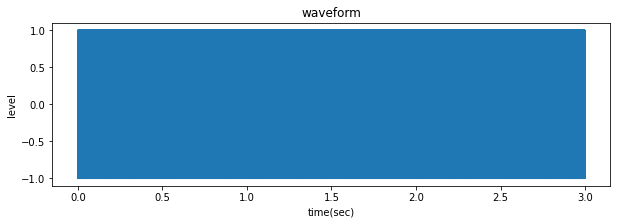

In [7]:
plt.figure(figsize=(10, 3))
plt.plot(t, ys)
plt.xlabel('time(sec)')
plt.ylabel('level')
plt.title('waveform')

- 物凄い数が圧縮して表示されているので、塗りつぶされたように表示されている

- 時間範囲の限定をすると改善される

Text(0.5, 1.0, 'waveform')

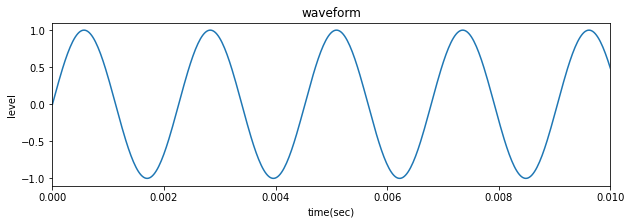

In [8]:
plt.figure(figsize=(10, 3))
plt.plot(t, ys)
plt.xlim(0, 0.01)          # 範囲を絞り込む
plt.xlabel('time(sec)')
plt.ylabel('level')
plt.title('waveform')

- 物理現象ではスピーカーのコーン（振動紙）が連続的に動いているが…
    - <u>離散化されている</u>
        - **1秒間に　44,100　個にバラバラに区切ってバラバラになっている**

#### マーカーplotで確認してみる

Text(0.5, 1.0, 'waveform')

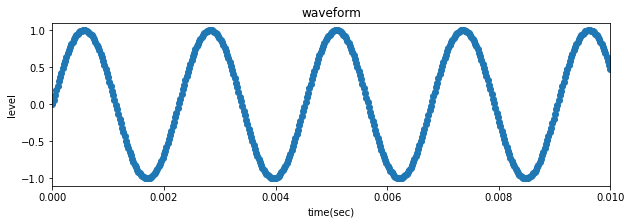

In [9]:
plt.figure(figsize=(10, 3))
plt.plot(t, ys, ls='', marker='o')  # ls=''->　線は描かない : 1個１個マーカーで描く
plt.xlim(0, 0.01)          # 範囲を絞り込む
plt.xlabel('time(sec)')
plt.ylabel('level')
plt.title('waveform')

- まだ重なって見えるので 0 ~ 1000分の１秒まで拡大してみる

Text(0.5, 1.0, 'waveform')

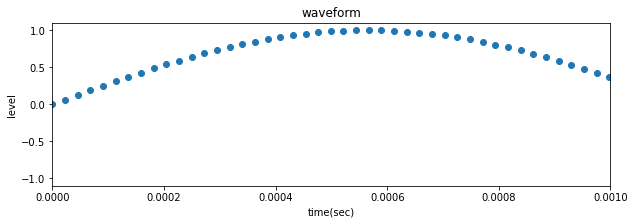

In [11]:
plt.figure(figsize=(10, 3))
plt.plot(t, ys, ls='', marker='o')  # ls=''->　線は描かない : 1個１個マーカーで描く
plt.xlim(0, 0.001)          # 範囲を絞り込む
plt.xlabel('time(sec)')
plt.ylabel('level')
plt.title('waveform')

#### 一見連続したデジタルdataに見えるが、実際は上記のような<u>「 離散化 」</u>されたデジタルdataである

### データを眺める
- 音をデータとして眺める

In [12]:
print(t[:5])
print(ys[:5])

[0.00000000e+00 2.26759084e-05 4.53518167e-05 6.80277251e-05
 9.07036334e-05]
[0.         0.06293319 0.12561688 0.18780256 0.24924369]


## サウンドをノートブックで作成する
- jupyter notebook には、サウンドを再生する機能がついている
- 必要なAPI を読み込む必要はある

In [14]:
from IPython.display import Audio # Notebook サウンド機能の為のAPI

In [15]:
a1 = Audio(ys, rate=r)  # 配列 ys で指定した周波数でサウンド object にする
display(a1)

- 音色を全く持たない単純で純粋な音　->　サインカーブ

## まとめ
- <u>１つのサウンドデータは「時系列データ」である</u>
    - １つのサウンドチャンネルは一次元配列として扱う
        - スピーカーのコーン紙が振動する振幅幅の時系列データ


- <u>Jupyter Notebookで一次元配列を再生する方法</u>
    - Audio クラスを使用する
    - 読み込み方　:　**from IPython.display import Audio**
        - a1 = Audio(サウンド配列, rate=サンプリング周波数)
        - display(a1)　:　Audio object が a1 に作成され、それを再生する

# 音声データの取り扱い(2)

### WAV形式音声ファイルへの出力
- <u>NumPyの一次元配列をWAVファイルへ出力する</u>
    - Pythonに標準添付されている wave modelu(laibrary)を使用する


- <u>処理の流れ</u>
    - WAV形式ファイル作成
        - ファイルを開いた後に下記の設定が重要
    - WAV形式ファイルへの情報設定
        - **サンプリング周波数**
        - **量子化ビット数(バイト数)**
        - **チャンネル数**
    - 出力するNumPy配列を適切な形に変換する
        - **出力処理を実行してファイルを閉じる**

### WAV形式サウンドファイルの出力

- <u>スケール変換</u>
    - １６bit整数の+の上限値　：　１６ビット整数の幅をめいいっぱい拡大する為に行う(スケールが十分な大きさになる)


- <u>型変換</u>
    - float（浮動小数点数） を intger（整数）


#### WAV形式に変換する時は上記のような変換が必ず必要になる

In [16]:
ys16 = (32767*ys).astype('int16')  # １６ビット量子化

### 量子化ビット数に合わせた配列データ変換
- <u>量子化ビット数に合わせるために波形データのスケールを変換する</u>
    - 波形はどんな値でも表現することができる(float, intger)、どんな形・大きさの波形も作り出すことができる
        - デジタルデバイスに合わせて変換しないと使用はできない
    - **8ビット(1バイト)量子化**　->　-128 ~ 127の範囲　(int8)
        - 音質は問わない場合(人の話し声など)
    - **16ビット(2バイト)量子化**　->　-32,768 ~ 32,767の範囲(int16) 
        - 十分な音楽鑑賞に耐えうる最低限の品質
    - 例) sin(t)を１６ビット量子化する
        - 値の範囲は -1.0 ~ 1.0 である　※　小さすぎると記録されない
        - -> -32,768 ~ 32,767の範囲に拡大する必要がある : 明いっぱいの振幅をとって表現することができる
        - data型を　int16 に変換する

## WAV module による WAVファイルへの出力

In [18]:
import wave # ライブラリーの読み込み
wf = wave.open('snd01.wav', 'wb') # ファイル名　:　開くときのモード(書き込み:wb or 読み取り)/WAVファイルを出力用に作成する
wf.setframerate(r)                # サンプリング周波数の設定
wf.setsampwidth(2)                # 量子化ビット数 (バイト単位で与える)
wf.setnchannels(1)                # モノラルなので 1 
wf.writeframesraw(ys16.tobytes()) # 配列オブジェクト.tobytes -> バイト列に変換
wf.close()

#### 上記のパターンでのサウンドファイルの書き出しは行う
- 1. 開いて
- 2. 設定して
- 3. 書き出して
- 4. 閉じる

## まとめ
- <u>WAV形式ファイルの取り扱い - 「wave module」</u>
    - ファイル作成　:　wf = wave.open('ファイル名', 'wb')
    - サンプリング周波数　:　wf.setframerate(サンプリング周波数)
    - 量子化ビット数(バイト数)の設定　:　wf.setsampwidth(バイト数)
    - チャンネル数の設定　:　wf.setnchannels(チャンネル数)
    - バイト列をファイルに出力　:　wf.writeframesraw(バイト列)
        - object を一塊(ブロップ)のバイト列に変換
    - ファイルを閉じる　:　wf.close()
    
    
- <u>配列をバイト列に変換する</u>
    - 配列.tobytes()
    - バイトの塊に変換する

# 音声データの取り扱い(3)

### ステレオサウンド(多チャンネル)の扱い
- <u>標準的なオーディオセットは「左」、「右」 ２チャンネル</u>
    - 「左」、「右」 別々のマイクロフォンで採取したサウンドを「左」、「右」 それぞれのスピーカーで再生する
    - **「 臨場感 」**の実現

### 左右２チャンネル(ステレオ)のサウンドの扱い

In [19]:
yc = np.cos(2*np.pi*f*t)  # 余弦関数の波形データ

### ステレオサウンドをnotebookで再生する

In [20]:
ysc = np.array([ys, yc])
print(ysc)

[[ 0.00000000e+00  6.29331887e-02  1.25616878e-01 ... -1.25616878e-01
  -6.29331887e-02 -8.50577956e-13]
 [ 1.00000000e+00  9.98017742e-01  9.92078828e-01 ...  9.92078828e-01
   9.98017742e-01  1.00000000e+00]]


- 単純に束ねて１つの二次元配列にした
- 1つの行が１つのチャンネル

### ステレオサウンド

In [21]:
a2 = Audio(ysc, rate=r)  # 再生可能な Audio object へ変換
display(a2)

### モノラルのデータ

In [22]:
a1 = Audio(ys, rate=r)  # 配列 ys で指定した周波数でサウンド object にする
display(a1)

## ステレオサウンドをWAVファイルに出力する
- notebook の出力機能と WAVファイルの入出力機能は全く別の種類のモノ


#### 基本として、WAVファイルは全部埋め込んだ一直線の一次元のdataにする必要がある
- 左右のdataを交互に配置する
- 左,右,左,右,左,右,左,右... のように1つおきに交互に配置してファイルに出力する

In [23]:
# 左右のdataを交互に配置して一次元データにする
ylr = np.array(list(zip(32767*ys, 32767*yc))).ravel().astype('int16') # 左右交互に合成して型を変換する
b = ylr.tobytes()                                                     # それをバイト列に変換

### 上記の説明
- <u>左右のチャンネルのデータを一次元にする</u>
    - 左チャンネル　:　[ 左１, 左2, 左3, 左4... ]
    - 右チャンネル　:　[ 右1, 右2, 右3, 右4... ]
    
    - **統合したもの**　:　[ 左1, 右1, 左2, 右2, 左3, 右3... ]
        - 別々であったものを互い違いに交互にはめ込む

  
- <u>左右のチャンネルを統合して 16ビット量子化する</u>
     - **np.array(list(zip(左チャンネル, 右チャンネル))).ravel().astype('int16')**
     - *考え方*
         - list(zip(左チャンネル, 右チャンネル))　で束ねてlistに変換する
         - それを　np.array(...) で配列に変換
         - それを raval()メソッドで一次元に展開
         - それを astype('int16') で16ビット整数に型変換する(１６ビット量子化)

### WAVファイルに出力する

In [24]:
wf = wave.open('snd02.wav', 'wb') # ファイル名　:　開くときのモード(書き込み:wb or 読み取り)/WAVファイルを出力用に作成する
wf.setframerate(r)                # サンプリング周波数の設定
wf.setsampwidth(2)                # 量子化ビット数 (バイト単位で与える)
wf.setnchannels(2)                # ステレオなので ２　（左右）
wf.writeframesraw(b)              # 配列オブジェクト.tobytes -> バイト列に変換
wf.close()

## まとめ
- <u>多チャンネルの扱い</u>
    - notebookによる再生
        - **np.array([　右チャンネル, 左チャンネル　])**　から Audio object を生成する
        - notebook の場合は, 右チャンネル, 左チャンネルの順番
        - これで二次元に直す -> Audio ojbect に変換 ->　display()関数で表示・再生


- <u>WAV形式ファイルにする場合</u>
    - 左, 右のチャンネル要素を交互に並べた一次元配列にして,適切にスケールや変換を施して出力する
    - **WAV形式は、　「 左, 右 」の順番で押し込んでいく**　※ 順番に注意

# 音声データの取り扱い

### WAV形式ファイルを読み込む
- NumPyの配列への変換
- モノラル(1チャンネル), ステレオ(2チャンネル)それぞれの場合
- 各種情報の取得(サンプリング周波数, 量子化ビット数, チャンネル数)
- 波形の表示と再生

## WAV形式サウンドファイルの入力

In [28]:
wf = wave.open('voiceMono.wav', 'rb')  # サウンドファイルの読み込み
r = wf.getframerate()  # 戻り値として wf が持っているサンプリング周波数を取得できる
qb = wf.getsampwidth()  # 量子化ビット数を取得(バイト数)
ch = wf.getnchannels() # サウンドチャンネル数を取得
frm = wf.getnframes()  # 時間軸のデータ個数を得られる (データpointの個数)・離散化
buf = wf.readframes(frm)  # 全データの取得(何フレーム読み取るか)
wf.close()

In [29]:
print(frm/r, '秒')
print(r, 'Hz')
print(qb, 'byte')
print(ch, 'ch')
print(frm, 'frames')

1.1000680272108843 秒
44100 Hz
2 byte
1 ch
48513 frames


### 読み取ったbyte列をNumPyの配列に変換する

In [30]:
y = np.frombuffer(buf, dtype='int16') # 塊のバイト列を適宜分解して、配列の形に変換してくれる関数

Text(0.5, 1.0, 'waveform')

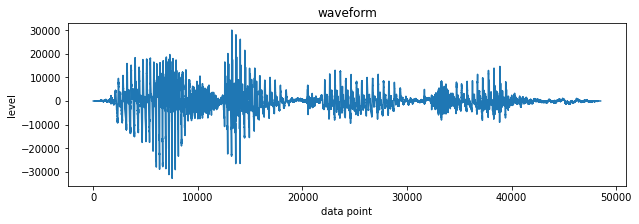

In [32]:
plt.figure(figsize=(10, 3))
plt.plot(y)  #　引数データは１つでもOK : 横軸はデータ個数,縦軸に目的のdata
plt.xlabel('data point')
plt.ylabel('level')
plt.title('waveform')

### サウンドの再生

In [33]:
a3 = Audio(y, rate=r)
display(a3)

## ステレオサウンドの読み込み

In [35]:
wf = wave.open('voiceStereo.wav', 'rb')  # サウンドファイルの読み込み
r = wf.getframerate()  # 戻り値として wf が持っているサンプリング周波数を取得できる
qb = wf.getsampwidth()  # 量子化ビット数を取得(バイト数)
ch = wf.getnchannels() # サウンドチャンネル数を取得
frm = wf.getnframes()  # 時間軸のデータ個数を得られる (データpointの個数)・離散化
buf = wf.readframes(frm)  # 全データの取得(何フレーム読み取るか)
wf.close()
print(frm/r, '秒')
print(r, 'Hz')
print(qb, 'byte')
print(ch, 'ch')
print(frm, 'frames')
y = np.frombuffer(buf, dtype='int16') # 塊のバイト列を適宜分解して、配列の形に変換してくれる関数

1.1000680272108843 秒
44100 Hz
2 byte
2 ch
48513 frames


### 左右のチャンネルの分離

In [36]:
y1 = y[::2] # スライス= 最初から最後まで２つおきに取得する / 左チャンネル
y2 = y[1::2] # スライス= １から最後まで2つおきに取得 / 右チャンネル

Text(0, 0.5, 'right')

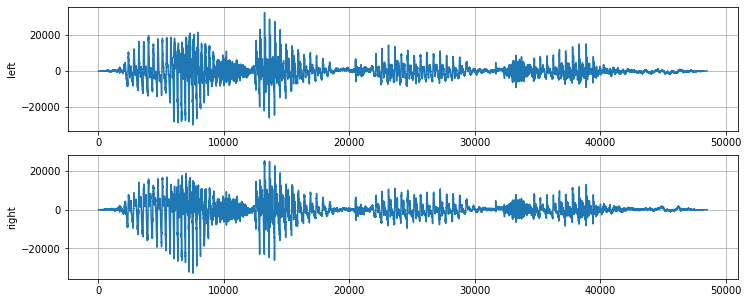

In [37]:
# 左右の波紋を並べてプロットする
fig, ax = plt.subplots(2, 1, figsize=(12, 5))
ax[0].plot(y1)
ax[0].grid()
ax[0].set_ylabel('left')
ax[1].plot(y2)
ax[1].grid()
ax[1].set_ylabel('right')

### 再生させる

In [38]:
a4 = Audio(np.array([y2, y1]), rate=r)
display(a4)

- イヤホンで聞いてみるとモノラルとステレオの違いがよく理解できる
- ステレオは左右の広がりがある＝**「 臨場感 」** がある

## まとめ
- <u>サウンドobject wf から各種の情報を取得する方法</u>
    - **r = wf.getframerate( )**　:　*サンプリング周波数*
    - **qb = wf.getsampwidth( )**　:　*量子ビット数(バイト数)*
    - **ch = wf.getnchannels( )**　:　*チャンネル数の取得(モノラル or ステレオ or もっと多い)*
    - **frm = wf.getnframes( )**　:　*フレーム数(data pointの個数)*
    - **buf = wf.readframes( frm )**　:　*全データ取得*


- <u>再生時間の取得(算出方法)</u>
    - **フレーム数 / サンプリング周波数**　:　*単位は秒で再生時間を取得できる*


- <u>バイト列からNumPyの配列へ変換</u>
    - **np.frombuffer( バイト列,　dtype=データ型)**
    - そうしてからやっと取り扱える data になる

- <u>ステレオサウンドの左右の分離</u>
    - **配列[ ::2 ]**　->　*左チャンネル(最初~最後まで２つおきに)*
    - **配列[ 1::2 ]**　->　*右チャンネル(１~最後まで２つおきに)*
        - スライスを使用して、左だけ、右だけの情報を取得する